In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from apyori import apriori
import os
import sys
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
import copy
from copy import deepcopy

In [3]:
printing_mode = True

On importe le travail préalable

In [4]:
%run import_data

Les variables qui, d'un premier abord, semblent inutiles.

In [5]:
colonnes_inutiles = ['num_veh','Num_Acc']
""",
                                'locp',
                                'actp',
                                'etatp',
                                'catv',
                                'hrmn',
                                'mois',
                                'jour',
                                'catvopp',
                                'occutc',
                                'place']
"""

",\n                                'locp',\n                                'actp',\n                                'etatp',\n                                'catv',\n                                'hrmn',\n                                'mois',\n                                'jour',\n                                'catvopp',\n                                'occutc',\n                                'place']\n"

In [6]:
merged_data = merged_data.drop(colonnes_inutiles,axis = 1)

In [7]:
df = pd.get_dummies(merged_data, columns = merged_data.columns)
results = list(apriori(df))

In [8]:
y = merged_data.grav
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

Mise en place d'apriori sur les données des décédés

In [9]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

listing_apriori_bis = []
data_accident = merged_data[merged_data.grav == 2].drop('grav', axis = 1)



for indexe in data_accident.index:
    event = []
    for colonne in data_accident.columns:
        if not (data_accident[colonne][indexe] == 0):
            event.append(colonne + str(data_accident[colonne][indexe]))
    listing_apriori_bis.append(event)

len(listing_apriori_bis)



min_sup = 0.40
min_conf = 0.90
results_apriori_decedes = list(apriori(listing_apriori_bis, min_support = min_sup, min_confidence = min_conf))

print(len(results_apriori_decedes))

os.system('say "fini"')

95


0

In [10]:
if printing_mode:
    for x in range(0,len(results_apriori_decedes)):
        print(results_apriori_decedes[x].items)
        print('support')
        print(results_apriori_decedes[x].support)
        print('confiance')
        print(results_apriori_decedes[x].ordered_statistics[0].confidence)


frozenset({'int1', 'agg1'})
support
0.7283887468030691
confiance
0.9110684580934102
frozenset({'catu1', 'place1.0'})
support
0.7227621483375959
confiance
0.9992927864214993
frozenset({'catv_gen2', 'catv7'})
support
0.648081841432225
confiance
1.0
frozenset({'int1', 'catv7'})
support
0.589769820971867
confiance
0.9100236779794791
frozenset({'secu11.0', 'catv7'})
support
0.40971867007672635
confiance
0.9123006833712984
frozenset({'catv_gen2', 'int1'})
support
0.6317135549872123
confiance
0.9100957995578483
frozenset({'catv_gen2', 'secu11.0'})
support
0.4332480818414322
confiance
0.9646924829157175
frozenset({'catvopp7', 'catvopp_gen2'})
support
0.6465473145780051
confiance
1.0
frozenset({'secu11.0', 'int1'})
support
0.4112531969309463
confiance
0.9157175398633258
frozenset({'atm1', 'int1', 'agg1'})
support
0.5447570332480819
confiance
0.9071550255536627
frozenset({'catu1', 'int1', 'agg1'})
support
0.5457800511508951
confiance
0.9057724957555178
frozenset({'catu1', 'place1.0', 'agg1'})
su

On essaie de prédire la vraie catégorie

In [11]:


### Préparation des données
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)


train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train


### Parametres
max_depth=10
learning_rate=0.01
n_estimators=100
silent=True
objective='binary:logistic'
booster='gblinear'
n_jobs=100
nthread=None
gamma=0.1
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
reg_alpha=0.5
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0
seed=None
missing=None


### Training
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)


### Predictions
predictions = gbm.predict(test_X)


### Resultats
pourcentage = (predictions - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.594694632943


Ici on essaie juste de prédire grave / pas grave

pourcentage
0.820604565083
tailles
(24312, 27) (8105, 27) (24312,) (8105,)
1750 4901 1109 345


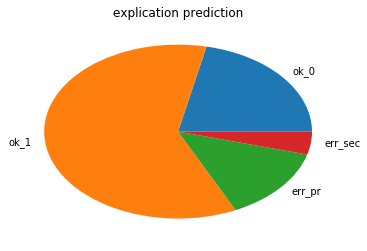

In [12]:
X_train_grave_pas_grave, X_test_grave_pas_grave, y_train_grave_pas_grave, y_test_grave_pas_grave = train_test_split(merged_data_sans_grav, y, test_size=0.25)

cat1 = [1]
cat2 = [2,3,4]

y_train_grave_pas_grave = y_train_grave_pas_grave.replace(cat1,0)
y_train_grave_pas_grave = y_train_grave_pas_grave.replace(cat2,1)
y_test_grave_pas_grave = y_test_grave_pas_grave.replace(cat1,0)
y_test_grave_pas_grave = y_test_grave_pas_grave.replace(cat2,1)

train_X_grave_pas_grave = X_train_grave_pas_grave.as_matrix()
test_X_grave_pas_grave = X_test_grave_pas_grave.as_matrix()
train_y_grave_pas_grave = y_train_grave_pas_grave
test_y_grave_pas_grave = y_test_grave_pas_grave

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X_grave_pas_grave, train_y_grave_pas_grave)
predictions_grave_pas_grave = gbm.predict(test_X_grave_pas_grave)

pourcentage = (predictions_grave_pas_grave - y_test_grave_pas_grave).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print('pourcentage')
print(1 + sum(pourcentage)/len(pourcentage))
print('tailles')
print(train_X_grave_pas_grave.shape,
      test_X_grave_pas_grave.shape, 
      train_y_grave_pas_grave.shape, 
      test_y_grave_pas_grave.shape)

length = len(predictions_grave_pas_grave)
y_test_liste_grave_pas_grave = list(y_test_grave_pas_grave)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions_grave_pas_grave[iteration] == 0:
        if y_test_liste_grave_pas_grave[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste_grave_pas_grave[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()


In [14]:
y_sexe = merged_data.sexe
merged_data_sans_sexe = merged_data.drop(['sexe'],axis = 1)


X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)

cat1 = [1,3,4]
cat2 = [2]

y_train = y_train.replace(cat1,0)
y_train = y_train.replace(cat2,1)
y_test = y_test.replace(cat1,0)
y_test = y_test.replace(cat2,1)

train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train
test_y = y_test

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)
predictions_decede_vivant = gbm.predict_proba(test_X)



In [15]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count

def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count

def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count

def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count



In [16]:
class ROC_curves:
    def __init__(self, pred = predictions_grave_pas_grave, res = y_test_grave_pas_grave, gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()
    


In [17]:
ROC = ROC_curves()
ROC.plot_it()


predictions = gbm.predict(test_X)
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

IndexError: invalid index to scalar variable.

In [ ]:
clf = LinearSVC(random_state=0, C = 123)
clf.fit(X_train,y_train)

In [ ]:
X_test.head()

In [ ]:
predictors = ['catu', 'choc', 'mom', 'catv_gen','catvopp_gen']
X_train = X_train[predictors]
X_test = X_test[predictors]
clf = LinearSVC( C = 123, max_iter=12)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [1]:
set(predictions)
sum(predictions)

NameError: name 'predictions' is not defined

In [13]:
merged_data


,place,catu,grav,sexe,secu,locp,actp,etatp,an_nais,senc,...,hrmn,lum,agg,int,atm,col,mom,catvopp,catv_gen,catvopp_gen
0,1.0,1,1,2,11.0,0.0,0.0,0.0,1983.0,0.0,...,1445,1,2,1,8,3,3,2,2,1
1,1.0,1,3,1,21.0,0.0,0.0,0.0,2001.0,0.0,...,1445,1,2,1,8,3,3,7,1,2
2,1.0,1,3,1,11.0,0.0,0.0,0.0,1960.0,0.0,...,1800,1,2,6,1,6,4,7,2,2
3,2.0,2,3,1,11.0,0.0,0.0,0.0,2000.0,0.0,...,1800,1,2,6,1,6,4,7,2,2
4,3.0,2,3,2,11.0,0.0,0.0,0.0,1962.0,0.0,...,1800,1,2,6,1,6,4,7,2,2
5,1.0,1,1,1,11.0,0.0,0.0,0.0,1997.0,0.0,...,1900,1,1,1,1,6,4,7,2,2
6,0.0,3,3,1,0.0,6.0,2.0,1.0,1970.0,0.0,...,1900,1,1,1,1,6,4,7,2,2
7,1.0,1,3,1,23.0,0.0,0.0,0.0,1999.0,0.0,...,1930,2,2,1,7,3,4,7,1,2
8,2.0,2,4,1,23.0,0.0,0.0,0.0,1999.0,0.0,...,1930,2,2,1,7,3,4,7,1,2
9,1.0,1,1,2,11.0,0.0,0.0,0.0,1985.0,0.0,...,1930,2,2,1,7,3,4,32,2,1


In [14]:
listing_apriori_bis

[['place1.0',
  'catu1',
  'sexe1',
  'secu21.0',
  'an_nais1996.0',
  'catv33',
  'obsm2.0',
  'choc1.0',
  'manv13.0',
  'mois4',
  'jour17',
  'hrmn1230',
  'lum1',
  'agg2',
  'int1',
  'atm1',
  'col5',
  'mom2',
  'catvopp7',
  'catv_gen1',
  'catvopp_gen2'],
 ['place1.0',
  'catu1',
  'sexe1',
  'secu11.0',
  'an_nais1992.0',
  'senc2.0',
  'catv7',
  'obsm2.0',
  'choc8.0',
  'manv1.0',
  'mois4',
  'jour2',
  'hrmn1045',
  'lum1',
  'agg1',
  'int2',
  'atm1',
  'col3',
  'mom1',
  'catvopp10',
  'catv_gen2',
  'catvopp_gen2'],
 ['place1.0',
  'catu1',
  'sexe1',
  'secu11.0',
  'an_nais1936.0',
  'senc1.0',
  'catv7',
  'obs13.0',
  'choc1.0',
  'manv1.0',
  'mois11',
  'jour7',
  'hrmn1515',
  'lum1',
  'agg1',
  'int1',
  'atm3',
  'col6',
  'mom3',
  'catvopp7',
  'catv_gen2',
  'catvopp_gen2'],
 ['place1.0',
  'catu1',
  'sexe1',
  'secu13.0',
  'an_nais1992.0',
  'catv7',
  'obs13.0',
  'choc1.0',
  'manv1.0',
  'mois12',
  'jour4',
  'hrmn530',
  'lum3',
  'agg1',
  'in

In [15]:
len(listing_apriori_bis)

1955

In [16]:
len(merged_data)

32417

In [19]:
len(df)

32417

In [74]:
accidents_grave = merged_data[merged_data.grav == 2].drop('grav',axis = 1)
df_accidents_graves = pd.get_dummies(merged_data, columns = merged_data.columns)
pourcentage_basique =  len(accidents_grave) / len(merged_data) 
seuil_sgdiscovery = len(accidents_grave) * 0.1
pourcentage_seuil = pourcentage_basique * 2
results_apriori_accidents_grave = list(apriori(df_accidents_graves,min_support = pourcentage_seuil))

In [81]:
print(len(results_apriori_accidents_grave))
print(seuil_sgdiscovery)
print('--------')
if len(results_apriori_accidents_grave)>seuil_sgdiscovery:
    print('  *-*')
print('--------')


395
195.5
--------
  *-*
--------


In [76]:
accidents_grave

,place,catu,sexe,secu,locp,actp,etatp,an_nais,senc,catv,...,hrmn,lum,agg,int,atm,col,mom,catvopp,catv_gen,catvopp_gen
30,1.0,1,1,21.0,0.0,0.0,0.0,1996.0,0.0,33,...,1230,1,2,1,1,5,2,7,1,2
53,1.0,1,1,11.0,0.0,0.0,0.0,1992.0,2.0,7,...,1045,1,1,2,1,3,1,10,2,2
55,1.0,1,1,11.0,0.0,0.0,0.0,1936.0,1.0,7,...,1515,1,1,1,3,6,3,7,2,2
58,1.0,1,1,13.0,0.0,0.0,0.0,1992.0,0.0,7,...,530,3,1,1,9,7,0,7,2,2
117,0.0,3,1,0.0,2.0,1.0,1.0,1952.0,1.0,32,...,745,2,1,1,1,6,1,32,1,1
121,1.0,1,2,12.0,0.0,0.0,0.0,1972.0,2.0,7,...,400,3,2,1,1,6,0,7,2,2
137,1.0,1,2,12.0,0.0,0.0,0.0,1949.0,0.0,10,...,1545,1,1,1,1,1,3,15,2,3
143,0.0,3,1,0.0,1.0,1.0,2.0,1931.0,0.0,7,...,1045,1,1,1,1,6,1,7,2,2
154,1.0,1,1,11.0,0.0,0.0,0.0,1987.0,0.0,7,...,200,3,1,1,1,6,0,7,2,2
163,4.0,2,1,13.0,0.0,0.0,0.0,1992.0,0.0,7,...,600,2,1,1,1,7,1,7,2,2


In [100]:
def PCTg(tableau):
    result = len(tableau[tableau.grav == 2]) / len(tableau)
    return result

def donnees_contraintes(contraintes):
    global merged_data
    table = copy.deepcopy(merged_data)
    for cont in contraintes:
        
        print('ok')
        table = table[table[cont[0]] == cont[1]]
    return table

liste_colonnes = merged_data.columns


premier_essai = PCTg(donnees_contraintes([['place',2],['etatp',0.0],['mom',3]]))
        
        
        
        

ok
ok
ok


In [101]:
premier_essai


0.05099931082012405